In [1]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('data.csv')

In [10]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
test_set = df[df.popularity == 0]
test_set

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7,0.99600,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.239,0,02FzJbHtqElixxCmrpSCUa,0.18600,9,0.195,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.366,1920
8,0.99600,['Francisco Canaro'],0.469,146840,0.238,0,02i59gYdjlhBmbbWhf8YuK,0.96000,8,0.149,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.621,1920
9,0.00682,['Meetya'],0.571,476304,0.753,0,06NUxS2XL3efRh0bloxkHm,0.87300,8,0.092,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.119,1920
10,0.95200,['Dorville'],0.688,150067,0.220,0,07jrRR1CUUoPb1FLfSy9Jh,0.00000,6,0.262,-15.208,0,Oouin,0,1920,0.8450,82.024,0.414,1920
11,0.99600,['Francisco Canaro'],0.579,167213,0.356,0,0ANuF7SvPeIHanGcCpy9jR,0.94800,10,0.174,-14.574,1,Desengaño - Remasterizado,0,1920-07-08,0.0394,131.494,0.703,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174383,0.79500,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020


In [4]:
train_and_validation = df[df["popularity"] != 0]
train_and_validation.shape

(133484, 19)

In [5]:
y = train_and_validation.popularity
# Keep only numeric attributes for PCA
X_numeric = train_and_validation.drop(['popularity', 'id', 'release_date', 'name', 'artists'], axis=1)
X_numeric.shape

(133484, 14)

In [6]:
ss = StandardScaler()
ss.fit(X_numeric)
X_scaled = ss.transform(X_numeric)
X_scaled

array([[ 1.51330369,  0.34877386, -0.50702403, ...,  1.05228275,
         0.38258836, -2.81715428],
       [ 0.54744372,  1.81446746, -0.64942649, ..., -1.04996965,
         1.57970254, -2.81715428],
       [ 1.5188546 ,  0.63152578, -0.54241064, ..., -0.69304627,
         0.59094684, -2.81715428],
       ...,
       [-1.19970813,  1.34129079, -0.17140877, ...,  0.05405692,
        -1.65136926,  1.72589693],
       [ 1.00817003,  0.21028313, -0.78377939, ..., -1.26343722,
        -0.7690658 ,  1.77132745],
       [ 1.31624605, -0.43600696,  0.08720565, ...,  1.763497  ,
        -0.80694916,  1.77132745]])

In [7]:
y_quartile = []
for val in y:
    if(val <= 25):
        y_quartile.append("q1")
    elif(val > 26 and val <= 50):
        y_quartile.append("q2")
    elif(val > 51 and val <= 75):
        y_quartile.append("q3")
    else:
        y_quartile.append("q4")
len(y_quartile)

133484

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_quartile, test_size=0.3, random_state=2020)

In [9]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [10]:
pred = neigh.predict(X_train)
print(metrics.classification_report(pred, y_train))

'              precision    recall  f1-score   support\n\n          q1       0.78      0.76      0.77     33032\n          q2       0.81      0.69      0.75     47284\n          q3       0.52      0.66      0.58     13002\n          q4       0.01      0.50      0.03       120\n\n    accuracy                           0.71     93438\n   macro avg       0.53      0.65      0.53     93438\nweighted avg       0.76      0.71      0.73     93438\n'

In [12]:
#pred = neigh.predict(X_val)
print(metrics.classification_report(pred, y_val))

              precision    recall  f1-score   support

          q1       0.72      0.71      0.71     14187
          q2       0.75      0.64      0.69     20172
          q3       0.45      0.57      0.50      5638
          q4       0.01      0.22      0.01        49

    accuracy                           0.65     40046
   macro avg       0.48      0.53      0.48     40046
weighted avg       0.69      0.65      0.67     40046



In [9]:
K_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred))
    pred = clf.predict(X_val)
    accuracy_test.append(metrics.accuracy_score(y_true = y_val, y_pred = pred))

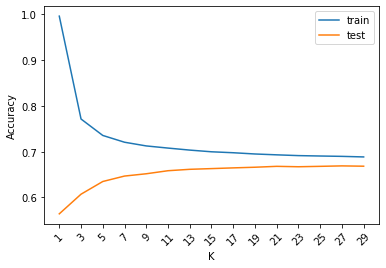

In [10]:
# Code here
# Plotting accuracy curve
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'test')
plt.xticks(np.arange(len(K_list)), K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
def getNormed(training_array, test_array, this_min = 0, this_max = 100):
    
    max_val = training_array.max()
    min_val = training_array.min()
    
    rat = (this_max - this_min)/(max_val - min_val)
    training_array = training_array * rat
    temp_min = training_array.min()
    training_array -= training_array.min()
    training_array += this_min
    
    test_array = test_array * rat
    test_array -= temp_min
    test_array += this_min
    
    return training_array, test_array

def getLog(training_array, test_array):
    return np.log(training_array), np.log(test_array)

In [12]:
X_train_norm, X_val_norm = getNormed(X_train, X_val, 100, 200)
X_train_log, X_val_log = getLog(X_train_norm, X_val_norm)

In [13]:
K_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27, 29]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_log, y_train)
    pred = clf.predict(X_train_log)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred))
    pred = clf.predict(X_val_log)
    accuracy_test.append(metrics.accuracy_score(y_true = y_val, y_pred = pred))

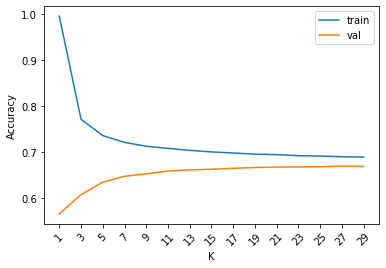

In [15]:
# Code here
# Plotting accuracy curve
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'val')
plt.xticks(np.arange(len(K_list)), K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
for i in accuracy_train:
    formatted_float = "{:.2f}".format(100 * i)
    print(formatted_float)

99.57
77.08
73.53
72.04
71.21
70.74
70.30
69.97
69.72
69.48
69.37
69.14
69.06
68.92
68.84


In [26]:
for i in accuracy_test:
    formatted_float = "{:.2f}".format(100 * i)
    print(formatted_float)

56.47
60.65
63.37
64.66
65.20
65.80
66.05
66.19
66.39
66.56
66.67
66.70
66.75
66.85
66.82
